<a href="https://colab.research.google.com/github/LucasFelip/Ativ_Preparacao_dados/blob/master/%5BAtiv%5D_A3_Prepara%C3%A7%C3%A3o_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IFMA - Sistemas de informação
## Aluno Lucas Felipe dos Reis Ferreira
## 20191SI0017

## Escolha do dataset - "House Prices: Advanced Regression Techniques"
Objetivo é prever o preço de venda de imóveis residenciais com base em diversas variáveis descritivas.

Problemas: 

* Valores nulos: Existem colunas com valores ausentes, o que pode afetar a qualidade e a integridade dos dados.

* Anomalias: Foram identificadas possíveis anomalias nos dados, tanto visualmente por meio de boxplots e histogramas, quanto por meio de medidas de skewness e kurtosis.

* Escala das variáveis numéricas: As variáveis numéricas podem estar em diferentes escalas, o que pode dificultar a comparação e interpretação dos dados.

* Codificação de variáveis categóricas: As variáveis categóricas precisam ser codificadas em formato numérico para serem utilizadas em algoritmos de aprendizado de máquina.

* Organização dos dados: É necessário organizar os dados de forma adequada, seguindo os princípios de "tidy data".

In [20]:
# Importar bibliotecas
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder

## Dataset
Usada a função read_csv do pandas para carregar o conjunto de dados "train.csv", depois é imprimedo as informações básicas sobre o conjunto de dados usando info() e as estatísticas descritivas usando describe().

In [21]:
# Carregar o conjunto de dados
data = pd.read_csv('train.csv')

# Informações básicas sobre o conjunto de dados
print("Informações básicas sobre o conjunto de dados:")
print(data.info())

# Descrever estatísticas do conjunto de dados
print("\nEstatísticas do conjunto de dados:")
print(data.describe())

Informações básicas sobre o conjunto de dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  Overa

## Tratamento de nulos 
Para o tratamento de valores nulos, é usado isnull().sum() para contar a quantidade de valores nulos em cada coluna do DataFrame, e é utilizada a biblioteca missingno para visualizar os valores nulos em um gráfico de matriz.


Valores nulos:
Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


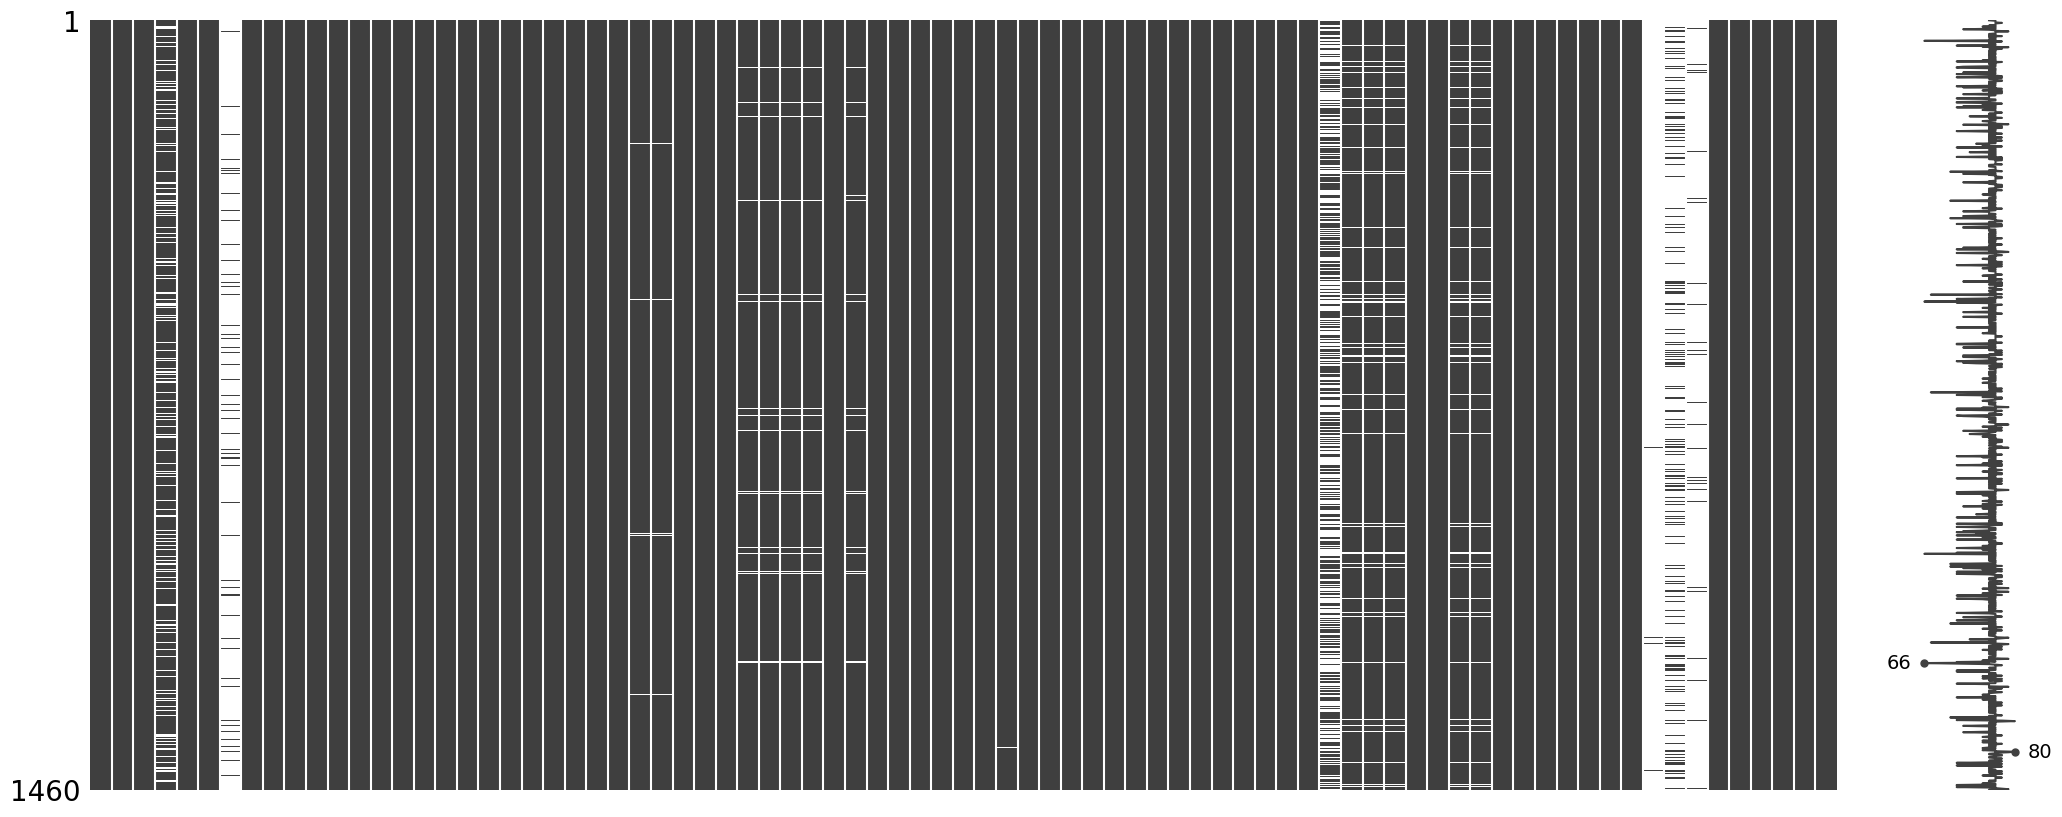

In [22]:
# Tratamento de valores nulos
print("\nValores nulos:")
print(data.isnull().sum())

# Visualizar os valores nulos em um gráfico de matriz
msno.matrix(data)
plt.show()

## Tratamento de anomalias
O tratamento de anomalias é realizado utilizando boxplot e histogramas, é usado boxplot e hist do seaborn e matplotlib, respectivamente, para criar visualizações dos dados numéricos. O boxplot é útil para identificar outliers e distribuição dos dados, enquanto os histogramas mostram a distribuição das variáveis numéricas.

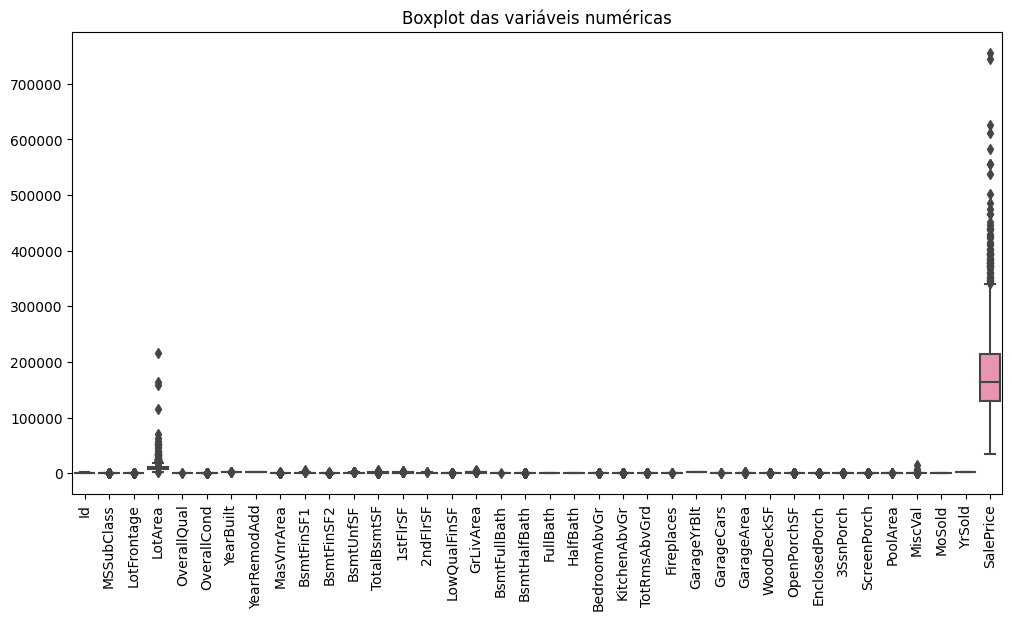

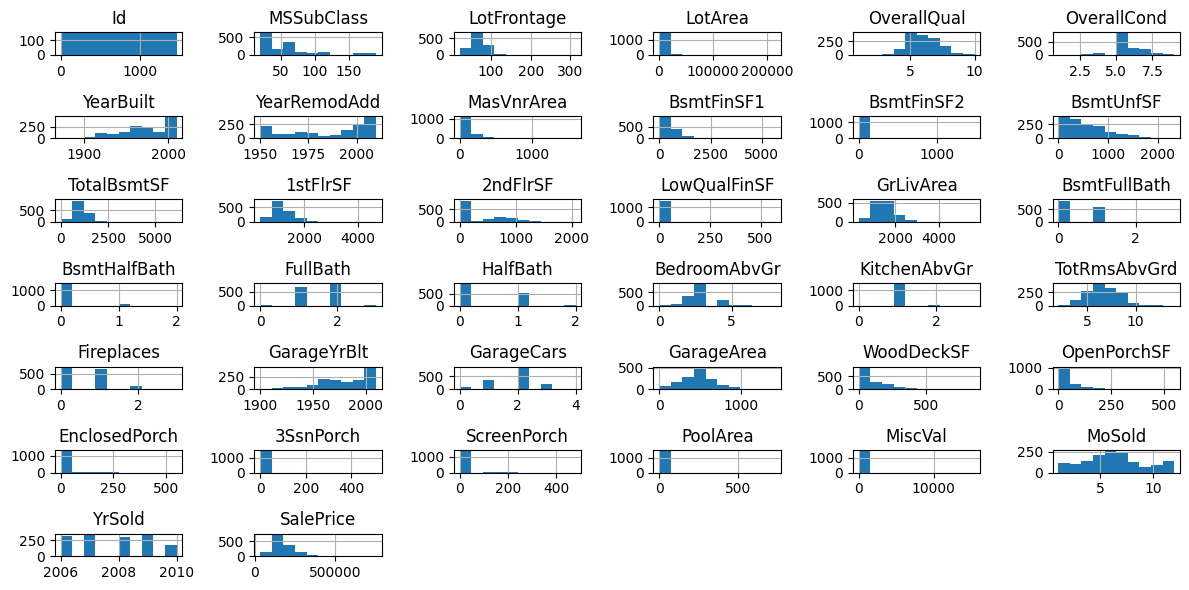

In [23]:
# Identificar anomalias usando boxplot para colunas numéricas
plt.figure(figsize=(12, 6))
sns.boxplot(data=data.select_dtypes(include='number'))
plt.title('Boxplot das variáveis numéricas')
plt.xticks(rotation=90)
plt.show()

# Identificar anomalias usando histogramas para colunas numéricas
data.select_dtypes(include='number').hist(figsize=(12, 6))
plt.tight_layout()
plt.show()

## Transformações
As transformações realizadas incluem a reescala das variáveis numéricas usando o StandardScaler do sklearn e a codificação das variáveis categóricas usando o LabelEncoder do sklearn. A reescala é aplicada nas colunas numéricas selecionadas, garantindo que os valores estejam na mesma escala. A codificação é aplicada nas colunas categóricas, convertendo os valores em números para serem utilizados em modelos de machine learning.

In [25]:
# Reescala das variáveis numéricas usando o StandardScaler
scaler = StandardScaler()
data_numeric = data.select_dtypes(include='number')
data_scaled = pd.DataFrame(scaler.fit_transform(data_numeric), columns=data_numeric.columns)

# Codificação das variáveis categóricas usando o LabelEncoder
data_categorical = data.select_dtypes(include='object')
data_encoded = data_categorical.apply(LabelEncoder().fit_transform)

# Concatenar as variáveis numéricas reescaladas e as variáveis categóricas codificadas
data_transformed = pd.concat([data_scaled, data_encoded], axis=1)

## Organização 
A organização dos dados é feita através da criação de um novo DataFrame chamado data_tidy, o método melt para transformar as colunas selecionadas em variáveis e valores, facilitando a análise e visualização dos dados.

In [26]:
# Selecionar as variáveis relevantes para o problema
selected_columns = ['SalePrice', 'OverallQual', 'OverallCond', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea']

# Criar um novo DataFrame com as colunas selecionadas
data_selected = data_transformed[selected_columns].copy()

# Organizar os dados em formato tidy
data_tidy = data_selected.melt(id_vars='SalePrice', var_name='Variable', value_name='Value')

# Exibir o DataFrame com os dados organizados
print("Dados organizados (tidy data):")
print(data_tidy.head())

Dados organizados (tidy data):
   SalePrice     Variable     Value
0   0.347273  OverallQual  0.651479
1   0.007288  OverallQual -0.071836
2   0.536154  OverallQual  0.651479
3  -0.515281  OverallQual  0.651479
4   0.869843  OverallQual  1.374795
